# `Project on:- Medical study in which a mouse is effected from a virus and given various doses of two medicines and they measured out in millimeters and, we wait two weeks to see wheather they are still infected or not.

# `classification`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"/Users/ishant/Documents/jose+portillia+ml/DATA/mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

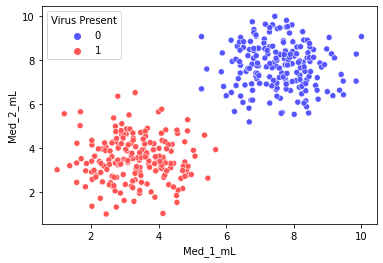

In [5]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',
                data=df,palette='seismic')

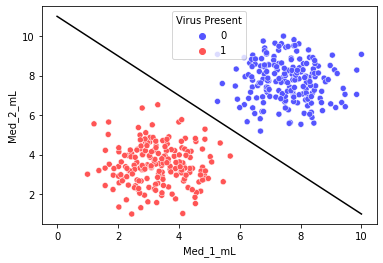

In [6]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='seismic',data=df)

# We want to somehow automatically create a separating hyperplane ( a line in 2D)

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

In [7]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [8]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

#### NOTE: For this example, we will explore the algorithm, so we'll skip any scaling or even a train\test split for now

In [9]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1) 

In [10]:
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [13]:
def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

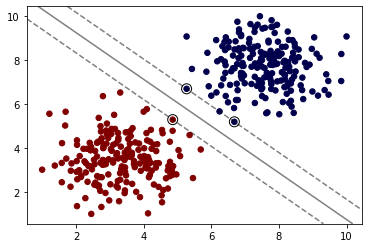

In [14]:
plot_svm_boundary(model,X,y)

In [20]:
model = SVC(kernel='linear',C=0.005)
model.fit(X,y)

SVC(C=0.005, kernel='linear')

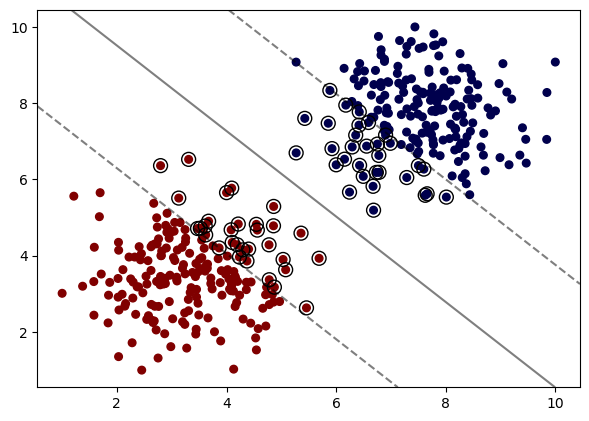

In [21]:
plt.figure(figsize=(7,5),dpi=100)
plot_svm_boundary(model,X,y)
plt.show()

In [32]:
model = SVC(kernel='rbf',C=1,gamma='scale')
model.fit(X,y)

SVC(C=1)

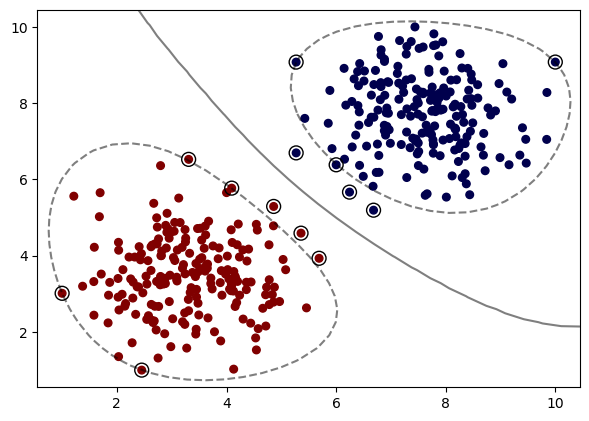

In [33]:
plt.figure(figsize=(7,5),dpi=100)
plot_svm_boundary(model,X,y)
plt.show()

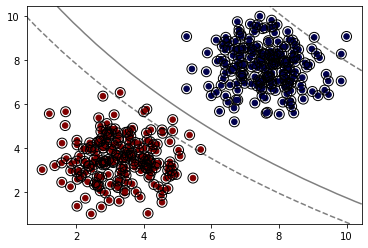

In [34]:
model = SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [35]:
# as you go the degree higher and higherthe hyplane starts to become curve higher degrees are neede in the dataset
# where higher amount of features are present
model = SVC(kernel='poly',C=1,degree=4)
model.fit(X,y)

SVC(C=1, degree=1, kernel='poly')

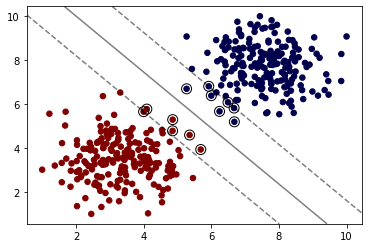

In [36]:

plot_svm_boundary(model,X,y)

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
svm = SVC()
param_grid = {'C':[0.01,.01,1],'kernel':['linear','rbf','poly','sigmoid']}

In [39]:
grid = GridSearchCV(svm,param_grid)

In [40]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.01, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [41]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}